# Homework to Session 8. Neural Networks and Deep Learning

In [1]:
import urllib.request
import numpy as np
import tensorflow as tf

In [ ]:
! mkdir data

## Images Loading and Datasets' Creation

In this homework,will be built a model for classification an image as a dino or a dragon. Model'll be built and trained on the base "Dino or Dragon?" dataset

In [ ]:
url = 'https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip'
filename = 'data.zip'
urllib.request.urlretrieve(url, filename)

In [ ]:
%%capture
! unzip data.zip -d data;

## Building of CNN

It's needed to develop the model with following structure:

The shape for input should be (150, 150, 3)   
Next, create a convolutional layer (Conv2D):   
Use 32 filters   
Kernel size should be (3, 3) (that's the size of the filter)   
Use 'relu' as activation   
Reduce the size of the feature map with max pooling (MaxPooling2D)   
Set the pooling size to (2, 2)   
Turn the multi-dimensional result into vectors using a Flatten layer   
Next, add a Dense layer with 64 neurons and 'relu' activation   
Finally, create the Dense layer with 1 neuron - this will be the output   
The output layer should have an activation - use the appropriate activation for the binary classification case   
As optimizer use SGD with the following parameters:   

SGD(lr=0.002, momentum=0.8)

### Question 1:

Since we have a binary classification problem, what is the best loss function for us?

Answer: binary crossentropy

In [2]:
input_size = 150
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_size, input_size, 3)))
model.add(tf.keras.layers.Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

2022-11-23 16:36:02.626972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 16:36:02.639192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 16:36:02.641048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 16:36:02.643425: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [3]:
tf.random.set_seed(1)

In [4]:
model.build(input_shape=(20, 150, 150, 3))

In [5]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss=tf.keras.losses.BinaryCrossentropy()
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

### Question 2:

What's the total number of parameters of the model? You can use the summary method for that.

Answer: 11215873

## Datasets generation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_gen = ImageDataGenerator(rescale=1./255)

In [9]:
train_ds = train_gen.flow_from_directory('./data/train', class_mode='binary', target_size=(150, 150), batch_size=20, shuffle=True)

Found 1594 images belonging to 2 classes.


In [10]:
test_gen = ImageDataGenerator(rescale=1./255)

In [11]:
test_ds = test_gen.flow_from_directory('./data/test', class_mode='binary', target_size=(150, 150), batch_size=20, shuffle=True)

Found 403 images belonging to 2 classes.


## Checkpointing

In [12]:
chechpoint1 = tf.keras.callbacks.ModelCheckpoint(
    'model_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

## Training

In [13]:
hist = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
    callbacks=[chechpoint1]
)

Epoch 1/10


2022-11-23 16:36:47.947893: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200


80/80 [==============================] - 11s 111ms/step - loss: 0.5942 - accuracy: 0.6807 - val_loss: 0.4613 - val_accuracy: 0.8387
Epoch 2/10
80/80 [==============================] - 9s 111ms/step - loss: 0.4399 - accuracy: 0.8030 - val_loss: 0.5407 - val_accuracy: 0.6749
Epoch 3/10
80/80 [==============================] - 9s 106ms/step - loss: 0.3774 - accuracy: 0.8438 - val_loss: 0.3558 - val_accuracy: 0.8536
Epoch 4/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3313 - accuracy: 0.8651 - val_loss: 0.3636 - val_accuracy: 0.8462
Epoch 5/10
80/80 [==============================] - 8s 106ms/step - loss: 0.3043 - accuracy: 0.8726 - val_loss: 0.3571 - val_accuracy: 0.8263
Epoch 6/10
80/80 [==============================] - 8s 105ms/step - loss: 0.2792 - accuracy: 0.8902 - val_loss: 0.4547 - val_accuracy: 0.7816
Epoch 7/10
80/80 [==============================] - 8s 106ms/step - loss: 0.2472 - accuracy: 0.9059 - val_loss: 0.4689 - val_accuracy: 0.7965
Epoch 8/10
80/80

### Question 3:

What is the median of training accuracy for all the epochs for this model?

In [14]:
hist.history['accuracy']

[0.6806775331497192,
 0.8030112981796265,
 0.8437892198562622,
 0.865119218826294,
 0.8726474046707153,
 0.8902133107185364,
 0.9058971405029297,
 0.8814303874969482,
 0.9309912323951721,
 0.9353826642036438]

In [15]:
np.median(hist.history['accuracy'])

0.8770388960838318

Answer: 0.9 (the clothest)

### Question 4:

What is the standard deviation of training loss for all the epochs for this model?

In [16]:
hist.history['loss']

[0.5942058563232422,
 0.43988141417503357,
 0.37738052010536194,
 0.33132514357566833,
 0.30434074997901917,
 0.27923184633255005,
 0.24715425074100494,
 0.27883100509643555,
 0.20875433087348938,
 0.18743589520454407]

In [17]:
np.std(hist.history['loss'])

0.11471837239665174

Answer: 0.1 (the clothest)

## Applying data augmentation

In [18]:
train_gen_a = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
train_ds_aug = train_gen_a.flow_from_directory('./data/train', class_mode='binary', target_size=(150, 150), batch_size=20, shuffle=True)

Found 1594 images belonging to 2 classes.


In [20]:
chechpoint2 = tf.keras.callbacks.ModelCheckpoint(
    'model_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [21]:
hist2 = model.fit(
    train_ds_aug,
    epochs=10,
    validation_data=test_ds,
    callbacks=[chechpoint2]
)

Epoch 1/10
80/80 [==============================] - 15s 191ms/step - loss: 0.4587 - accuracy: 0.7942 - val_loss: 0.2646 - val_accuracy: 0.8908
Epoch 2/10
80/80 [==============================] - 15s 183ms/step - loss: 0.4432 - accuracy: 0.8055 - val_loss: 0.3126 - val_accuracy: 0.8660
Epoch 3/10
80/80 [==============================] - 15s 183ms/step - loss: 0.4217 - accuracy: 0.8018 - val_loss: 0.7512 - val_accuracy: 0.6725
Epoch 4/10
80/80 [==============================] - 15s 183ms/step - loss: 0.4099 - accuracy: 0.8112 - val_loss: 0.2796 - val_accuracy: 0.8759
Epoch 5/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3809 - accuracy: 0.8306 - val_loss: 0.7027 - val_accuracy: 0.7345
Epoch 6/10
80/80 [==============================] - 15s 184ms/step - loss: 0.3840 - accuracy: 0.8319 - val_loss: 1.3624 - val_accuracy: 0.5459
Epoch 7/10
80/80 [==============================] - 15s 183ms/step - loss: 0.3706 - accuracy: 0.8338 - val_loss: 0.3786 - val_accuracy: 0.8387

### Question 5:

What is the mean of test loss for all the epochs for the model trained with augmentations?

In [22]:
s1 = np.array(hist.history['val_loss'])
s2 = np.array(hist2.history['val_loss'])
print(s1)
print(s2)

[0.46134892 0.54074633 0.35577878 0.36359683 0.35711935 0.45470327
 0.46887413 0.28906086 0.29163092 0.27936909]
[0.26463211 0.31259823 0.75121182 0.27956259 0.70272022 1.36235809
 0.37859076 0.38196722 0.45956999 0.39600256]


In [23]:
np.mean(np.append(s1, s2))

0.45757210403680804

Answer: 0.37 (the clothest)

### Question 6:

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [24]:
s1 = np.array(hist.history['val_accuracy'])
s2 = np.array(hist2.history['val_accuracy'])
print(s1)
print(s2)

[0.83870965 0.67493796 0.853598   0.84615386 0.82630271 0.78163773
 0.79652607 0.88833749 0.88089329 0.88337469]
[0.89081883 0.86600494 0.67245656 0.87593055 0.73449129 0.54590571
 0.83870965 0.84863526 0.80893302 0.82878411]


In [25]:
np.average(np.append(s1, s2))

0.809057068824768

Answer: 0.84 (the clothest)

## Using model

In [26]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

Load the model with the highest accuracy

In [28]:
model_best = tf.keras.models.load_model('model_v2_01_0.891.h5')

Load an image with dino

In [39]:
path = 'data/test/dino/0d50f95a-8a4c-4712-8187-2f4008fd6241.jpg'

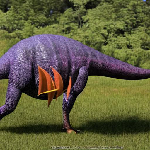

In [40]:
img = load_img(path, target_size=(150, 150))
img

In [41]:
x = np.array(img)
X = np.array([x])
pred = model_best.predict(X)
if pred[0][0] <= 0.5:
    print('dino')
else:
    print('dragon')

dino


Load an image with dragon

In [42]:
path = 'data/test/dragon/1e07914f-530e-4087-a377-cded306c360c.jpg'

In [43]:
img = load_img(path, target_size=(150, 150))

In [44]:
x = np.array(img)
X = np.array([x])
pred = model_best.predict(X)
if pred[0][0] <= 0.5:
    print('dino')
else:
    print('dragon')

dragon
